In [1]:
import pandas as pd # извлекаем панду  
import os # для работы с файлами
import re # для регулярных выражений
import seaborn as sns # для таблиц


In [2]:
path_dir = "D:\В работу!" # ссылка на самую верхнюю папку

In [3]:
def path_to_group_name(dir_adress): # ссылка на таблицу
    index_list = []
    # print(dir_adress)
    for index,value in enumerate(dir_adress): # проходим все символы в ссылке
        if value == "/":
            index_list.append(index)
    
    index_group_start,index_group_end = index_list[1],index_list[2] # вручную смотрим на индексы и вписываем
    index_sample_start,index_sample_end = index_list[2],index_list[3] #

    group_name = dir_adress[index_group_start+1:index_group_end] # выводим символы  между слешами из ссылки
    sample_name = dir_adress[index_sample_start+1:index_sample_end] # 
    return group_name,sample_name 

In [4]:

def Count_of_Area(correct_path,group_name,sample_name):
    islet_data_df_i = pd.read_csv(correct_path)
    data_i = islet_data_df_i[['ImageNumber','AreaShape_Area', 'Children_Islet_nucleus_Count','Children_Object_Glucagon_wo_double_stain_Count',
                              'Children_Object_Insulin_Glucagon_Nuclei_Count',
                              'Children_Object_Insulin_wo_double_stain_Count']].copy() # берем  колонки из большой таблицы
    data_i['Group'] = group_name # создали колонку "группа" и назвали ее символами, которые между слешами в первой части программы
    data_i['Sample'] = sample_name
    return(data_i)

In [5]:
empty_data = {'ImageNumber':[],'AreaShape_Area':[],'Children_Islet_nucleus_Count':[], 'Children_Object_Glucagon_wo_double_stain_Count':[], 
              'Children_Object_Insulin_Glucagon_Nuclei_Count' :[], 'Children_Object_Insulin_wo_double_stain_Count' :[],'Group':[],'Sample':[]} # это словарь. Заголовок и содержание
Number_of_nucleus_df = pd.DataFrame(empty_data) # сама таблица. пустая 


for address, dirs, files in os.walk(path_dir): # выдает строку с адресом последней папки(address), название всех папок(dirs), название файлов
    for file in files:
        if ".csv" in str(file):
            full_path = os.path.join(address, file) # добавляет файл к адресу
            correct_path = full_path.replace("\\","/")
            group_name,sample_name = path_to_group_name(correct_path)

     

            if "MyExpt_Islets" in str(file):
                # print(group_name,sample_name)
                Result = Count_of_Area(correct_path,group_name,sample_name)
                
                Number_of_nucleus_df = pd.concat([Number_of_nucleus_df,Result],axis=0)

Number_of_nucleus_df = Number_of_nucleus_df.rename(columns={'AreaShape_Area':'Area,px','Children_Islet_nucleus_Count':'Nucleus_all',
                                                             'Children_Object_Glucagon_wo_double_stain_Count':'Glucagon',  
                                                             'Children_Object_Insulin_Glucagon_Nuclei_Count': 'Insulin_Glucagon',
                                                              'Children_Object_Insulin_wo_double_stain_Count':'Insulin' })

Number_of_nucleus_df['Glucagon_part'] = Number_of_nucleus_df['Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100
Number_of_nucleus_df['Insulin_part'] = Number_of_nucleus_df['Insulin'] / Number_of_nucleus_df['Nucleus_all'] *100
Number_of_nucleus_df['Insulin_Glucagon_part'] = Number_of_nucleus_df['Insulin_Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100


print(Number_of_nucleus_df)

    ImageNumber   Area,px  Nucleus_all  Glucagon  Insulin_Glucagon  Insulin  \
0           1.0   13845.0         12.0       4.0               2.0      4.0   
1           2.0   26803.0         28.0      10.0               6.0     12.0   
2           3.0   17155.0         20.0       8.0              11.0      9.0   
3           4.0   82672.0        130.0      66.0              14.0     21.0   
0           1.0  174953.0        120.0      31.0              27.0     61.0   
..          ...       ...          ...       ...               ...      ...   
2           3.0   16996.0         20.0      13.0              20.0      0.0   
3           4.0   77934.0         30.0      30.0               0.0      0.0   
4           4.0   23028.0         17.0      17.0               0.0      0.0   
5           5.0   68028.0         45.0       2.0               1.0      2.0   
6           6.0  567363.0        404.0      13.0               6.0      5.0   

      Group      Sample  Glucagon_part  Insulin_par

In [6]:
writer = pd.ExcelWriter('D:\\В работу!\\Ins-Glu.xlsx')
Number_of_nucleus_df.to_excel(writer)
writer.save()

C:\Users\Анна\AppData\Local\Temp\ipykernel_9796\4230002791.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


<Axes: xlabel='Glucagon_part', ylabel='Group'>

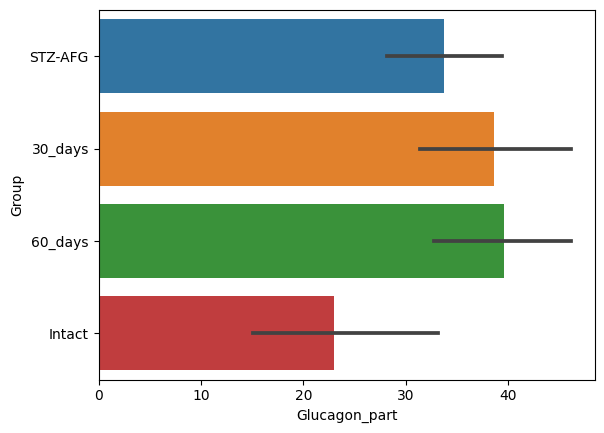

In [7]:
sns.barplot(data = Number_of_nucleus_df, x = 'Glucagon_part', y = 'Group')

<Axes: xlabel='Insulin_part', ylabel='Group'>

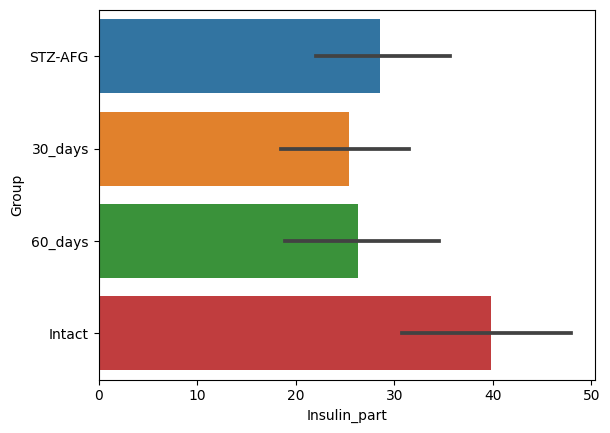

In [8]:
sns.barplot(data = Number_of_nucleus_df, x = 'Insulin_part', y = 'Group')

<Axes: xlabel='Insulin_Glucagon_part', ylabel='Group'>

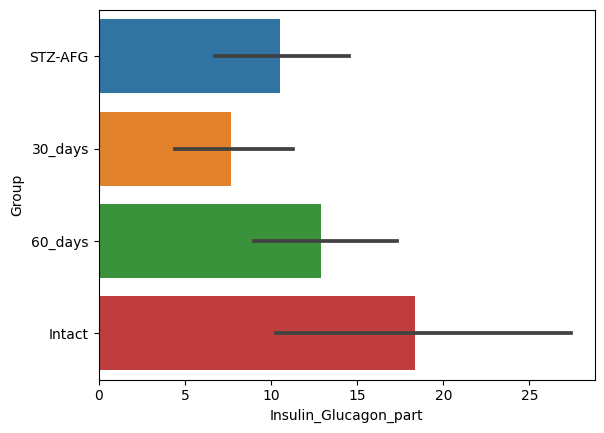

In [9]:
sns.barplot(data = Number_of_nucleus_df, x = 'Insulin_Glucagon_part', y = 'Group')